<h1>Introduction</h1>
The goal of this project is to anaylse biodiversity data from National Parks in the USA.

The project will scope, prepare, analyse and plot data, and then seek to explain the findings.

Some of the questions the project seeks to answer are:
- Biodiversity Analysis: Which parks have the highest and lowest biodiversity.
- Species Distribution: What is the distribution of different species categories (e.g., birds, mammals, etc.) across different parks.
- Which animals are the most prevalent and which animals are the least prevalent.
- Are certain types of species more likely to be endangered?

<h3>Data Sources</h3>

The data provided includes two csv files:
- species.csv provides data about each species and its conservation status. 
- observations.csv provides data about the observations of each species, and the National Park where the observation occured.

This data has been provided by codecademy.com


<h2>Scoping</h2>

It's beneficial to create a project scope whenever a new project is being started. Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, luckily in this project, data is already provided but still needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and questions that are aligned with the project goals. Lastly, evaluation will help us build conclusions and findings from our analysis.

<h3>Project Goals</h3>

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

    Which parks have the most biodiversity, and which parks have the least?
    Are certain types of species more likely to have a conservation status?
    Which parks have the greatest number of species with a conservation status?
    Which animals are the most and least prevalent and what is their distribution amongst parks?

<h3>Data</h3>

This project has two data sets that came with the package. The first csv file has information about each species and another has observations of species with park locations. This data will be used to analyze the goals of the project.
Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include:

    Distributions
    Counts
    Conservation status of species
    Observations of species in parks.

<h3>Evaluation</h3>

Lastly, it's a good idea to revisit the goals and check if the output of the analysis corresponds to the questions first set to be answered (in the goals section). This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This could also include limitations or if any of the analysis could have been done using different methodologies.

<h3>Reading the Data</h3>

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')


In [197]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [198]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [199]:
#Let's take a look at the conservation status info.
print(species_info['conservation_status'].value_counts())


conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


<h2>Which parks have the most biodiversity, and which parks have the least?</h2>

In [200]:
observations.duplicated().sum()

15

In [201]:
observations = observations.drop_duplicates()

In [227]:
observations['park_name'] = observations['park_name'].str.replace('National Park', 'NP')

In [228]:
biodiversity_by_park = observations.groupby('park_name')['scientific_name'].nunique()
print(biodiversity_by_park)
#Each park has the same species present, but how many observations of these species are there? 


park_name
Bryce NP                    5541
Great Smoky Mountains NP    5541
Yellowstone NP              5541
Yosemite NP                 5541
Name: scientific_name, dtype: int64


In [229]:
observation_totals = observations.groupby('park_name')['observations'].sum()
print(observation_totals)

park_name
Bryce NP                     575901
Great Smoky Mountains NP     431378
Yellowstone NP              1442314
Yosemite NP                  862836
Name: observations, dtype: int64


Based on total observations, Yellowstone has the highest number of species, whereas Great Smoky Mountains has the least. However this doesn't take into account the size of the parks. Each park is quite different in size and that is important:

    Yellowstone National Park: 8,991 km²
    Yosemite National Park: 3,027 km²
    Bryce National Park: 145.02 km²
    Great Smoky Mountains National Park: 2,114.16 km²

In [233]:
park_sizes = {
    'Bryce NP': 145.02,
    'Great Smoky Mountains NP': 2114.16,
    'Yellowstone NP': 8991,
    'Yosemite NP': 3027
}


observation_density = {}
for park, total in observation_totals.items():
    observation_density[park] = round(total/park_sizes[park], 2)

print(observation_density)
    
    
    

{'Bryce NP': 3971.18, 'Great Smoky Mountains NP': 204.04, 'Yellowstone NP': 160.42, 'Yosemite NP': 285.05}


According to this  Bryce National Park, has the greatest abundance of biodiversity per square kilometer. Let's show this in a graph.

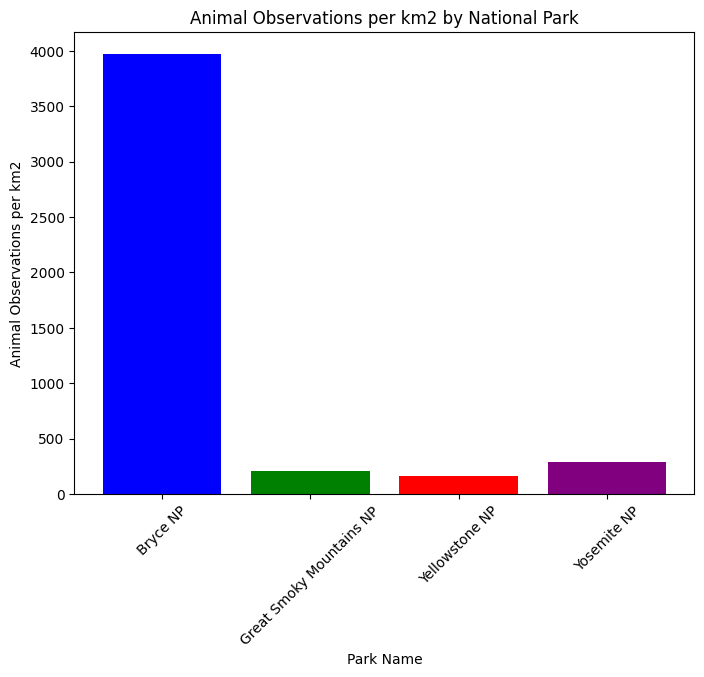

<Figure size 640x480 with 0 Axes>

In [234]:
plt.figure(figsize=(8,6))
plt.bar(observation_density.keys(), observation_density.values(), color=['blue','green','red','purple'])
plt.xlabel('Park Name')
plt.ylabel('Animal Observations per km2')
plt.title('Animal Observations per km2 by National Park')
plt.xticks(rotation=45)
plt.show()
plt.clf()

<h2>Are certain types of animals more likely to be have a conservation status?</h2>

In [235]:
print(species_info.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [236]:
species_info.duplicated(subset='scientific_name').sum()

0

In [237]:
species_info = species_info.drop_duplicates(subset='scientific_name')

In [238]:
species_info.duplicated(subset='scientific_name').sum()

0

<h3>For each category, how many species have some form of conservation status?</h3>

In [239]:
conservation_species = species_info[species_info['conservation_status'].notnull()]
conservation_counts = conservation_species['category'].value_counts()
conservation_counts_sorted = conservation_counts.sort_index()
print(conservation_counts_sorted)

category
Amphibian             7
Bird                 75
Fish                 10
Mammal               30
Nonvascular Plant     5
Reptile               5
Vascular Plant       46
Name: count, dtype: int64


<h3>What percentage of each category, have some form of conservation status?</h3>

In [240]:
# Working out the total number of species in each category
total_counts = species_info['category'].value_counts()
total_counts_sorted = reg_counts.sort_index()
print(reg_counts_sorted)

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
Name: count, dtype: int64


In [241]:
# Calculate the percentage of each category that has a conservation status
conservation_percentage = (conservation_counts_sorted / total_counts_sorted) * 100
conservation_percentage_sorted = conservation_percentage.sort_values()
print(conservation_percentage_sorted)

category
Vascular Plant        1.079305
Nonvascular Plant     1.501502
Reptile               6.410256
Fish                  8.000000
Amphibian             8.860759
Bird                 15.368852
Mammal               17.045455
Name: count, dtype: float64


<h3>The data shows that the mammals have the most species that have a conservation status, and vascular plants have the least species that are endangered. Lets show this in a graph</h3>

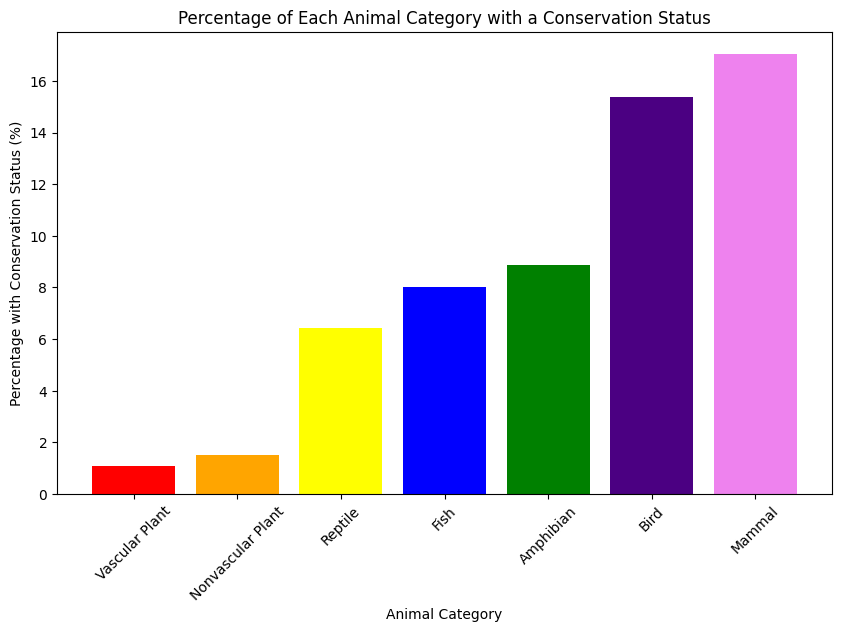

In [242]:
plt.figure(figsize=(10, 6))
plt.bar(conservation_percentage_sorted.index, conservation_percentage_sorted.values, color=['red','orange','yellow','blue','green','indigo','violet'])
plt.xlabel('Animal Category')
plt.ylabel('Percentage with Conservation Status (%)')
plt.title('Percentage of Each Animal Category with a Conservation Status')
plt.xticks(rotation=45)
plt.show()

<h2>Which parks have the greatest number of species with a conservation status?</h2>

To answer this we will create a list of all the species that have a conservation status, and then we will sum the total number of observations of these species in each park.

In [243]:
conserved_species = species_info[species_info['conservation_status'].notnull()]

In [244]:
print(conserved_species.head())

   category            scientific_name       common_names conservation_status
7    Mammal              Canis latrans             Coyote  Species of Concern
8    Mammal                Canis lupus          Gray Wolf          Endangered
9    Mammal                Canis rufus           Red Wolf          Endangered
29   Mammal           Eptesicus fuscus      Big Brown Bat  Species of Concern
30   Mammal  Lasionycteris noctivagans  Silver-Haired Bat  Species of Concern


In [245]:
conservation_observation = observations[observations['scientific_name'].isin(conserved_species['scientific_name'])]

In [246]:
park_observations = conservation_observation.groupby('park_name')['observations'].sum()

In [247]:
park_observations

park_name
Bryce NP                    16099
Great Smoky Mountains NP    11177
Yellowstone NP              38663
Yosemite NP                 23356
Name: observations, dtype: int64

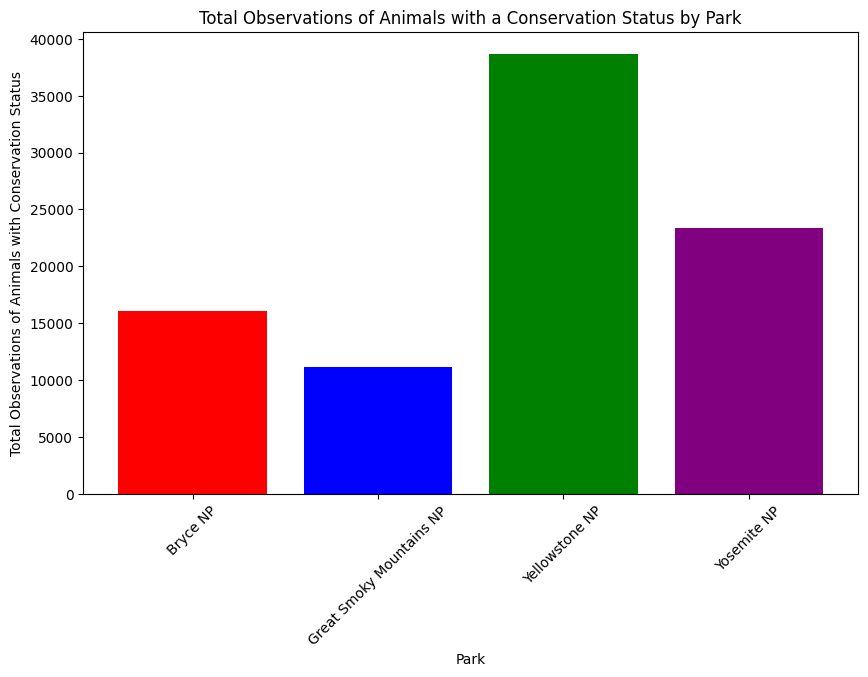

In [248]:
plt.figure(figsize=(10, 6))
plt.bar(park_observations.index, park_observations.values, color=['red','blue','green','purple'])
plt.xlabel('Park')
plt.ylabel('Total Observations of Animals with Conservation Status')
plt.title('Total Observations of Animals with a Conservation Status by Park)
plt.xticks(rotation=45)
plt.show()

This is unsurprising since Yellowstone is much larger than the other parks. Let's look at the density of observations like we did previously.

In [259]:
park_sizes = {
    'Bryce NP': 145.02,
    'Great Smoky Mountains NP': 2114.16,
    'Yellowstone NP': 8991,
    'Yosemite NP': 3027
}


park_observation_density = {}
for park, total in park_observations.items():
    park_observation_density[park] = round(total/park_sizes[park], 2)

print(park_observation_density)

{'Bryce NP': 85.66, 'Great Smoky Mountains NP': 4.35, 'Yellowstone NP': 3.4, 'Yosemite NP': 6.15}


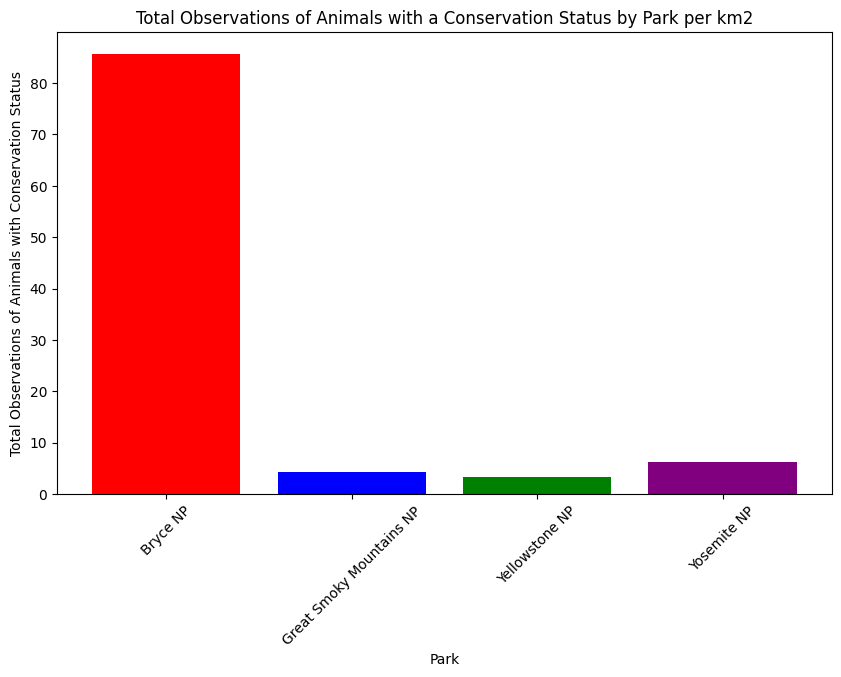

In [262]:
plt.figure(figsize=(10, 6))
plt.bar(park_observation_density.keys(), park_observation_density.values(), color=['red','blue','green','purple'])
plt.xlabel('Park')
plt.ylabel('Total Observations of Animals with Conservation Status')
plt.title('Total Observations of Animals with a Conservation Status by Park per km2')
plt.xticks(rotation=45)
plt.show()

This shows that there are more animals with a conservation status by km2 in Bryce NP than any where else. If you want to see a lot of protected wildlife, your best bet is to go for a walk in Bryce NP.

<h2>Which animals are the most and least prevalent and what is their distribution amongst parks?</h2>

To answer this question, the first step is to  group the observations by animal category, and then sum the total observations for each category.  The observations and category are in seperate files, so I need to merge the files on the scientific_name column first.

In [249]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains NP,68
1,Neovison vison,Great Smoky Mountains NP,77
2,Prunus subcordata,Yosemite NP,138
3,Abutilon theophrasti,Bryce NP,84
4,Githopsis specularioides,Great Smoky Mountains NP,85


In [250]:
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [251]:
merged_df = pd.merge(observations, species_info, on='scientific_name')

In [252]:
merged_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains NP,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite NP,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone NP,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce NP,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains NP,77,Mammal,American Mink,NaN


In [253]:
category_distribution = merged_df.groupby(['category', 'park_name'])['observations'].sum()
print(category_distribution)

category           park_name               
Amphibian          Bryce NP                       7380
                   Great Smoky Mountains NP       5707
                   Yellowstone NP                19440
                   Yosemite NP                   11444
Bird               Bryce NP                      51647
                   Great Smoky Mountains NP      37728
                   Yellowstone NP               126996
                   Yosemite NP                   76207
Fish               Bryce NP                      12423
                   Great Smoky Mountains NP       9206
                   Yellowstone NP                30574
                   Yosemite NP                   18615
Mammal             Bryce NP                      20550
                   Great Smoky Mountains NP      15012
                   Yellowstone NP                50539
                   Yosemite NP                   30339
Nonvascular Plant  Bryce NP                      32992
                   Gr

The most common category is Vascular Plants, the least common category are Amphibians. It is quite hard to read this data as it is, so it would be ideal to put this into a graph to visualize it better. Becuase there are so much to show, I think it is best to create a seperate graph for each cateogory that shows the distribution of that category across the 4 different parks. 

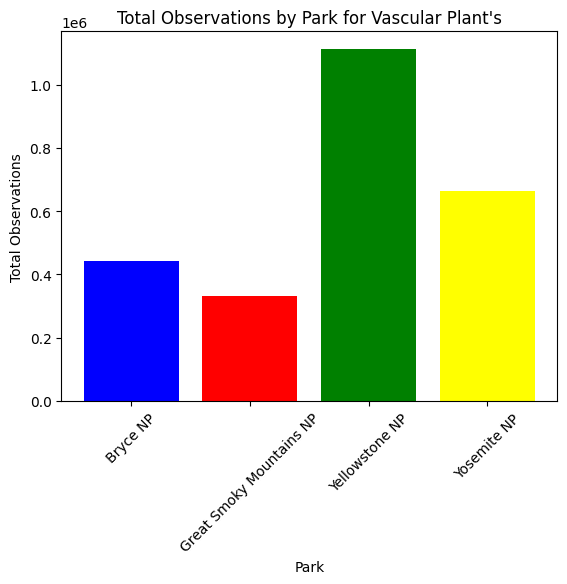

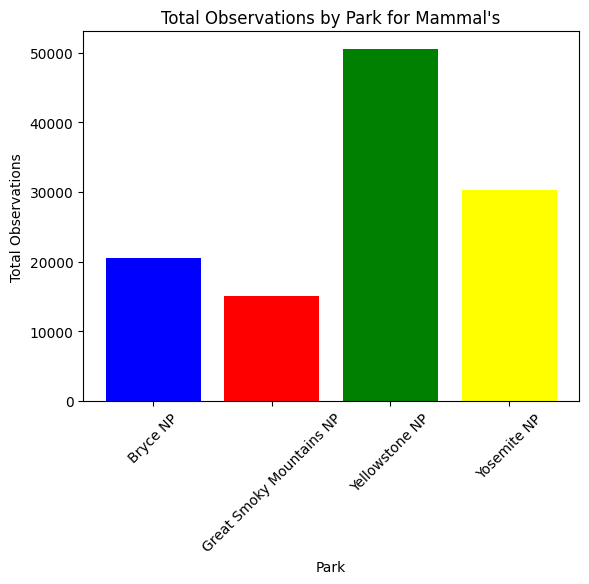

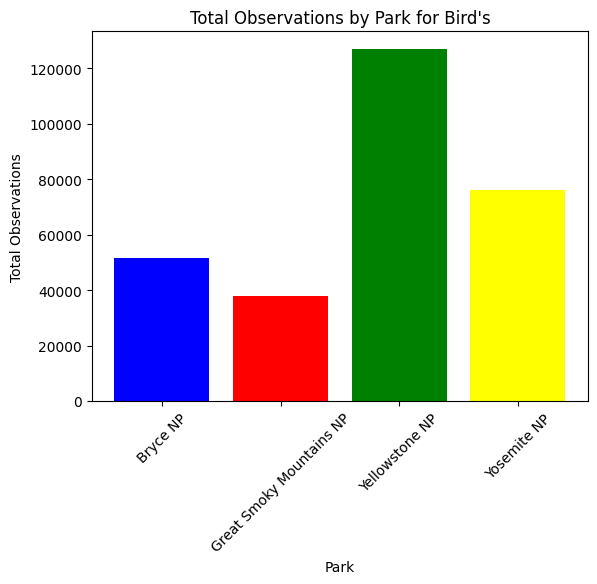

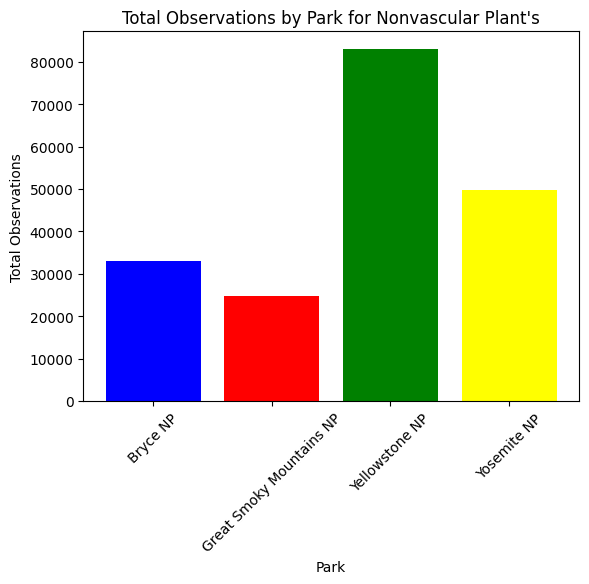

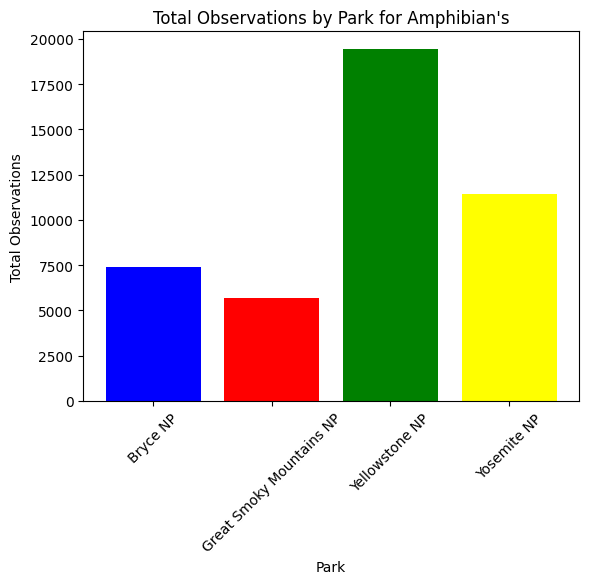

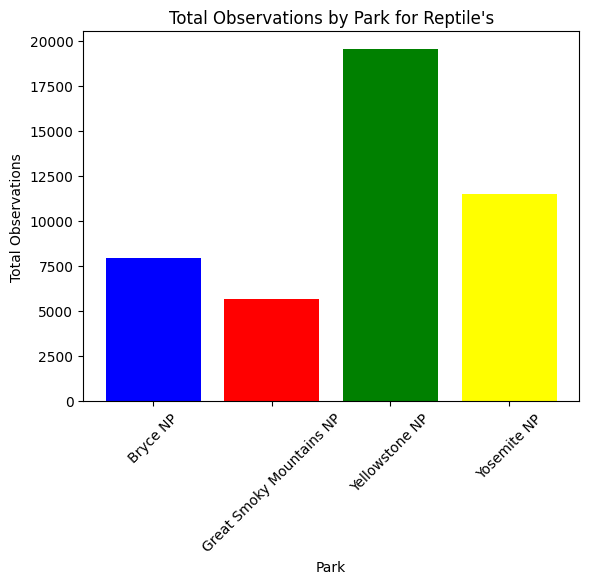

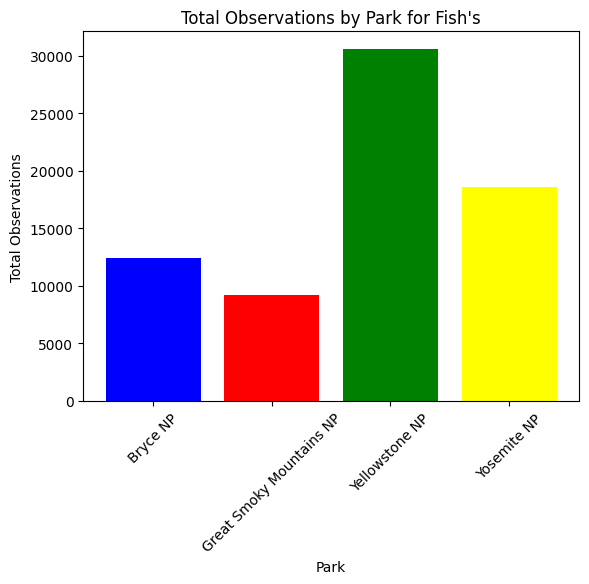

In [254]:

categories = merged_df['category'].unique()
#the park names are quite long and this can be problematic for showing on a graph. I'm going to replace 'National Park' with 'NP' to make it easier to read. 

for category in categories:
    #selecting all the instances of the current category
    category_data = merged_df[merged_df.category == category]
    #calculating the total observations of the category by park.
    park_observations = category_data.groupby('park_name')['observations'].sum()
    #plotting the observations by park
    plt.bar(park_observations.index, park_observations.values, width=0.8, color=['blue','red','green','yellow'])
    plt.xlabel('Park')
    plt.ylabel('Total Observations')
    plt.title(f'Total Observations by Park for {category}\'s')
    plt.xticks(rotation=45)
    plt.show()
    

<h2>Conclusion</h2>
In this project we have examined the questions:
    Which parks have the most biodiversity, and which parks have the least? 
    Are certain types of species more likely to have a conservation status?
    Which parks have the greatest number of species with a conservation status?
    Which animals are the most and least prevalent and what is their distribution amongst parks?


We have found that Bryce National Park is the most abudant per km2 for wildlife, that mammals are the most likely to have a conservation status, that yellowstone national park has the most species with a conservation status, which is not suprising due to it's size, and that Bryce National Park has the most conserved species by km2. If you want to see a lot of protected wildlife, your best bet is to go for a walk in Bryce NP. We have visualized the distribution of each animal category by park. 

Other questions we could answer as this portfolio develops are:

- Is the distribution of observations across different parks uniform? You can use a Chi-Square test to determine if the observed distribution of observations is significantly different from a uniform distribution.

- Is there a correlation between park size and the number of observations? A Pearson correlation could be used to test for a linear relationship between park size and total number of observations.

- Are certain types of animals (mammals, birds, etc.) more likely to be observed in certain parks? A Chi-Square test of independence could be used to determine if animal type and park are independent.

- Are some types of animals more likely to have a conservation status than others? This could be tested with a Chi-Square test of independence, comparing animal type and whether or not they have a conservation status.

- Is the distribution of observations across different animal types the same for all parks? This could be tested with a two-way ANOVA, comparing the number of observations for each animal type across different parks.

- Does the distribution of park sizes follow a normal distribution? This could be tested using a normality test, like the Shapiro-Wilk test.

- Do larger parks have a higher biodiversity (more unique species) than smaller parks? This could be tested using a correlation analysis or a regression analysis.